In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

from src.utils import funciones
from src.utils import bootcampviztools
from src.utils.funciones import variabilidad
from src.utils.bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_categorical_relationship_fin, plot_multiple_boxplots, plot_combined_graphs, plot_grouped_boxplots,plot_grouped_histograms

In [117]:
# cargar el dataset
df_adult = pd.read_csv("src/data/adult.csv")

In [118]:
# creo copia del dataset para trabajar
df = df_adult.copy()

<h2 align = "center">Exploración inicial y Limpieza de datos</h2>

In [119]:
# Miramos el tamaño del dataset y el info inicial.
print(df.shape)
print(df.info())

(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [120]:
# miramos una muestra del dataset
df.sample(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
18945,25,Private,441210,HS-grad,9,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
12399,27,Self-emp-not-inc,30244,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,80,United-States,<=50K
25947,44,Private,192878,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
27398,31,Private,187203,HS-grad,9,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K
19204,58,Private,239523,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
32537,37,Private,179137,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,39,United-States,<=50K
28993,32,Self-emp-not-inc,210926,11th,7,Separated,Handlers-cleaners,Unmarried,White,Female,0,0,40,Nicaragua,<=50K
9619,42,Private,210525,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,20,United-States,>50K
29787,25,Private,264055,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
2141,44,Self-emp-not-inc,274562,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,14344,0,40,United-States,>50K


In [121]:
# Confirm which columns show presence of missing values in str format "?"
# Confirmar que columnas tienen "?" como valores nulos
(df == "?").any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [122]:
# convert str missing values ("?") to NaN missing values for easier management.
df.replace("?", np.nan,inplace=True)

In [123]:
# Check missing values are now present with info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [124]:
# Check for duplicates
df.duplicated().value_counts()

False    32537
True        24
Name: count, dtype: int64

In [125]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [126]:
# show amount of missing values and which columns they are in
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [127]:
# check to see if all rows with missing values in workclass and occupation coincide.
# confirmar si todas las filas con nulos en workclass coinciden con las de occupation.
(df["occupation"].isna() == df["workclass"].isna()).all()

np.False_

In [128]:
# Check which rows don´t coincide
# mirar cuales no coinciden
df.loc[df["occupation"].isna() != df["workclass"].isna()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8874,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
13675,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
17089,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
21934,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
24483,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32331,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32338,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [129]:
# Check how many rows for the column "workclass" have the value "Never-worked".
# mirar cuantas filas de la columna "workclass" tienen el valor "Never-worked"
df["workclass"].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [130]:
# Create column "recode_never_worked" to show where we changed "Never-worked" to "unknown" in the column "workclass"
# Crear columna "recode_never_worked" para ver donde combiamos "Never-"worked" a "unknown".
df["recode_never_worked"]  = df["workclass"] == "Never-worked"
df.loc[df["recode_never_worked"], "workclass"] = "unknown"

In [131]:
# Create another column to show where we will fill the missing values with "unknown" in the columns "workclass","occupation" and "native.country".
# Creamos otra columna para enseñar donde rellanamos los valores nulos de las columnas "occupation" y "workclass"
df["had_missing_cat"] = (df[["workclass","occupation","native.country"]].isna().any(axis=1))

In [132]:
# Now fill the missing value with the value "unknown".
# Rellenar los valores nulos con el valor "unknown"
df["workclass"] = df["workclass"].fillna("unknown")
df["occupation"] = df["occupation"].fillna("unknown")
df["native.country"] = df["native.country"].fillna("unknown")

In [133]:
# Check info to make sure no missing values left.
# Confirmar que no queda valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  32537 non-null  int64 
 1   workclass            32537 non-null  object
 2   fnlwgt               32537 non-null  int64 
 3   education            32537 non-null  object
 4   education.num        32537 non-null  int64 
 5   marital.status       32537 non-null  object
 6   occupation           32537 non-null  object
 7   relationship         32537 non-null  object
 8   race                 32537 non-null  object
 9   sex                  32537 non-null  object
 10  capital.gain         32537 non-null  int64 
 11  capital.loss         32537 non-null  int64 
 12  hours.per.week       32537 non-null  int64 
 13  native.country       32537 non-null  object
 14  income               32537 non-null  object
 15  recode_never_worked  32537 non-null  bool  
 16  had_missi

In [134]:
# Treat "native country" variable and create two categories; United-States and Other.
# # Tratar la variable "native.country" y crear dos categorías: "United-States" y "Other"
df["native.country"] = ["United-States" if x == "United-States" else "Other" for x in df["native.country"]]

In [135]:
# Treat "race" variable; create three categories; "White","Black" and "Other"
# Tratar la variable "race" y crear tres categorias, "White","Black","Other"
df["race"] = df["race"].replace({"Asian-Pac-Islander":"Other","Amer-Indian-Eskimo":"Other"})

In [136]:
# Fix values "South" and "Hong" in the column "native.country"
# Arreglar valores "South" y "Hong" in la columna "native.country"
df["native.country"] = df["native.country"].replace({"South":"South-Korea", "Hong":"Hong-Kong"})

In [137]:
# drop "fnlwgt" column.
# Eliminar columna "fnlwgt".
df.drop(columns="fnlwgt",inplace = True)

In [138]:
# change column names to improve readability and use.
# Cambiar nombres de las columnas.
df = df.rename(columns= {"education.num":"education_num",
                         "marital.status":"marital_status",
                         "capital.gain":"capital_gain",
                         "capital.loss":"capital_loss",
                         "hours.per.week":"hours_per_week",
                         "native.country":"native_country",})

<h2 align="center">Analisis Univariante</h2>

In [139]:
# Check the cardinality of the variables 
# Mirar la cardinalidad de las variables y tipificar
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
age,73,0.22436,int64
workclass,8,0.024587,object
education,16,0.049175,object
education_num,16,0.049175,int64
marital_status,7,0.021514,object
occupation,15,0.046101,object
relationship,6,0.018441,object
race,3,0.00922,object
sex,2,0.006147,object
capital_gain,119,0.365737,int64


In [140]:
# clasificar las variables
df_tipificacion["Clasificada_como"] = "Categorica" # Partiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
age,73,0.22436,int64,Numerica Discreta
workclass,8,0.024587,object,Categorica
education,16,0.049175,object,Numerica Discreta
education_num,16,0.049175,int64,Numerica Discreta
marital_status,7,0.021514,object,Categorica
occupation,15,0.046101,object,Numerica Discreta
relationship,6,0.018441,object,Categorica
race,3,0.00922,object,Categorica
sex,2,0.006147,object,Binaria
capital_gain,119,0.365737,int64,Numerica Discreta


**Dataset:**  adult_clean.csv

**Descripción:**  El Adult Census Dataset contiene información demográfica, educativa y laboral de individuos adultos en Estados Unidos, utilizada para analizar su relación con el nivel de ingresos (≤$50K o >$50K).

**Periodo:**  1994

| Nombre del campo| Descripción| Tipo de variable | Importancia Inicial | Notas |
|-----------------|------------|------------------|---------------------|-------|
| age | Edad de la persona|Numerica discreta| 1 | 
| workclass | Tipo de empleo (privado, autónomo, etc.)| Categorica| 1 | Contiene valores "Unknown" que representan filas con datos faltantes o “never worked”; categorías estandarizadas.
| education | Nivel educativo alcanzado| Categorica | 1 | Categorías consistentes; se puede usar tal cual para análisis.
| education.num | Codificación numérica del nivel educativo| Categorica | 1 | Correlacionada directamente con education; representa años de educación.
| marital.status | Estado civil| Categorica | 3 | Categorías limpias; algunas combinaciones pueden ser raras (ej. “Married-spouse-absent”).
| occupation | Categoría profesional| Categorica | 1 | Contiene "unknown" para valores faltantes; algunas categorías muy poco frecuentes podrían agruparse en “Other” si es necesario.
| relationship | Relación familiar| Categorica | 2 | Categorías limpias; refleja relación familiar en el hogar.
| race | Categoría racial| Categorica | 1 | Distribución desigual: la mayoría White; las minorías pueden agruparse como “Other” para visualización.
| sex | Hombre o mujer| Binaria | 1 | Binaria: Male/Female; no requiere limpieza.
| capital.gain | Ganancias de capital| Numerica discreta | 2 | Muy sesgado, con muchos ceros; considerar log-transform o categorizar si se usa en análisis.
| capital.loss | Pérdidas de capital| Numerica discreta | 2 | Similar a capital-gain: muchos ceros, sesgado; podría agruparse o transformarse.
| hours.per.week | Horas trabajadas por semana | Numerica discreta | 1 | 
| native.country | País de origen| Categorica | 1 | La mayoría United-States; países raros se pueden agrupar en “Other”.
| income | Variable objetivo: ≤50K o >50K| Binaria | 0 | Variable objetivo binaria; no requiere limpieza adicional.

In [141]:
# Create two variables to analyse the categorical and numerical columns
# Creamos dos variables para analizar las columnas categoricas y numericas
columnas_categoricas = ["income","workclass","education","marital_status","occupation","relationship","race","sex","native_country"]
columnas_numericas = ["age","hours_per_week","education_num","capital_gain","capital_loss"]

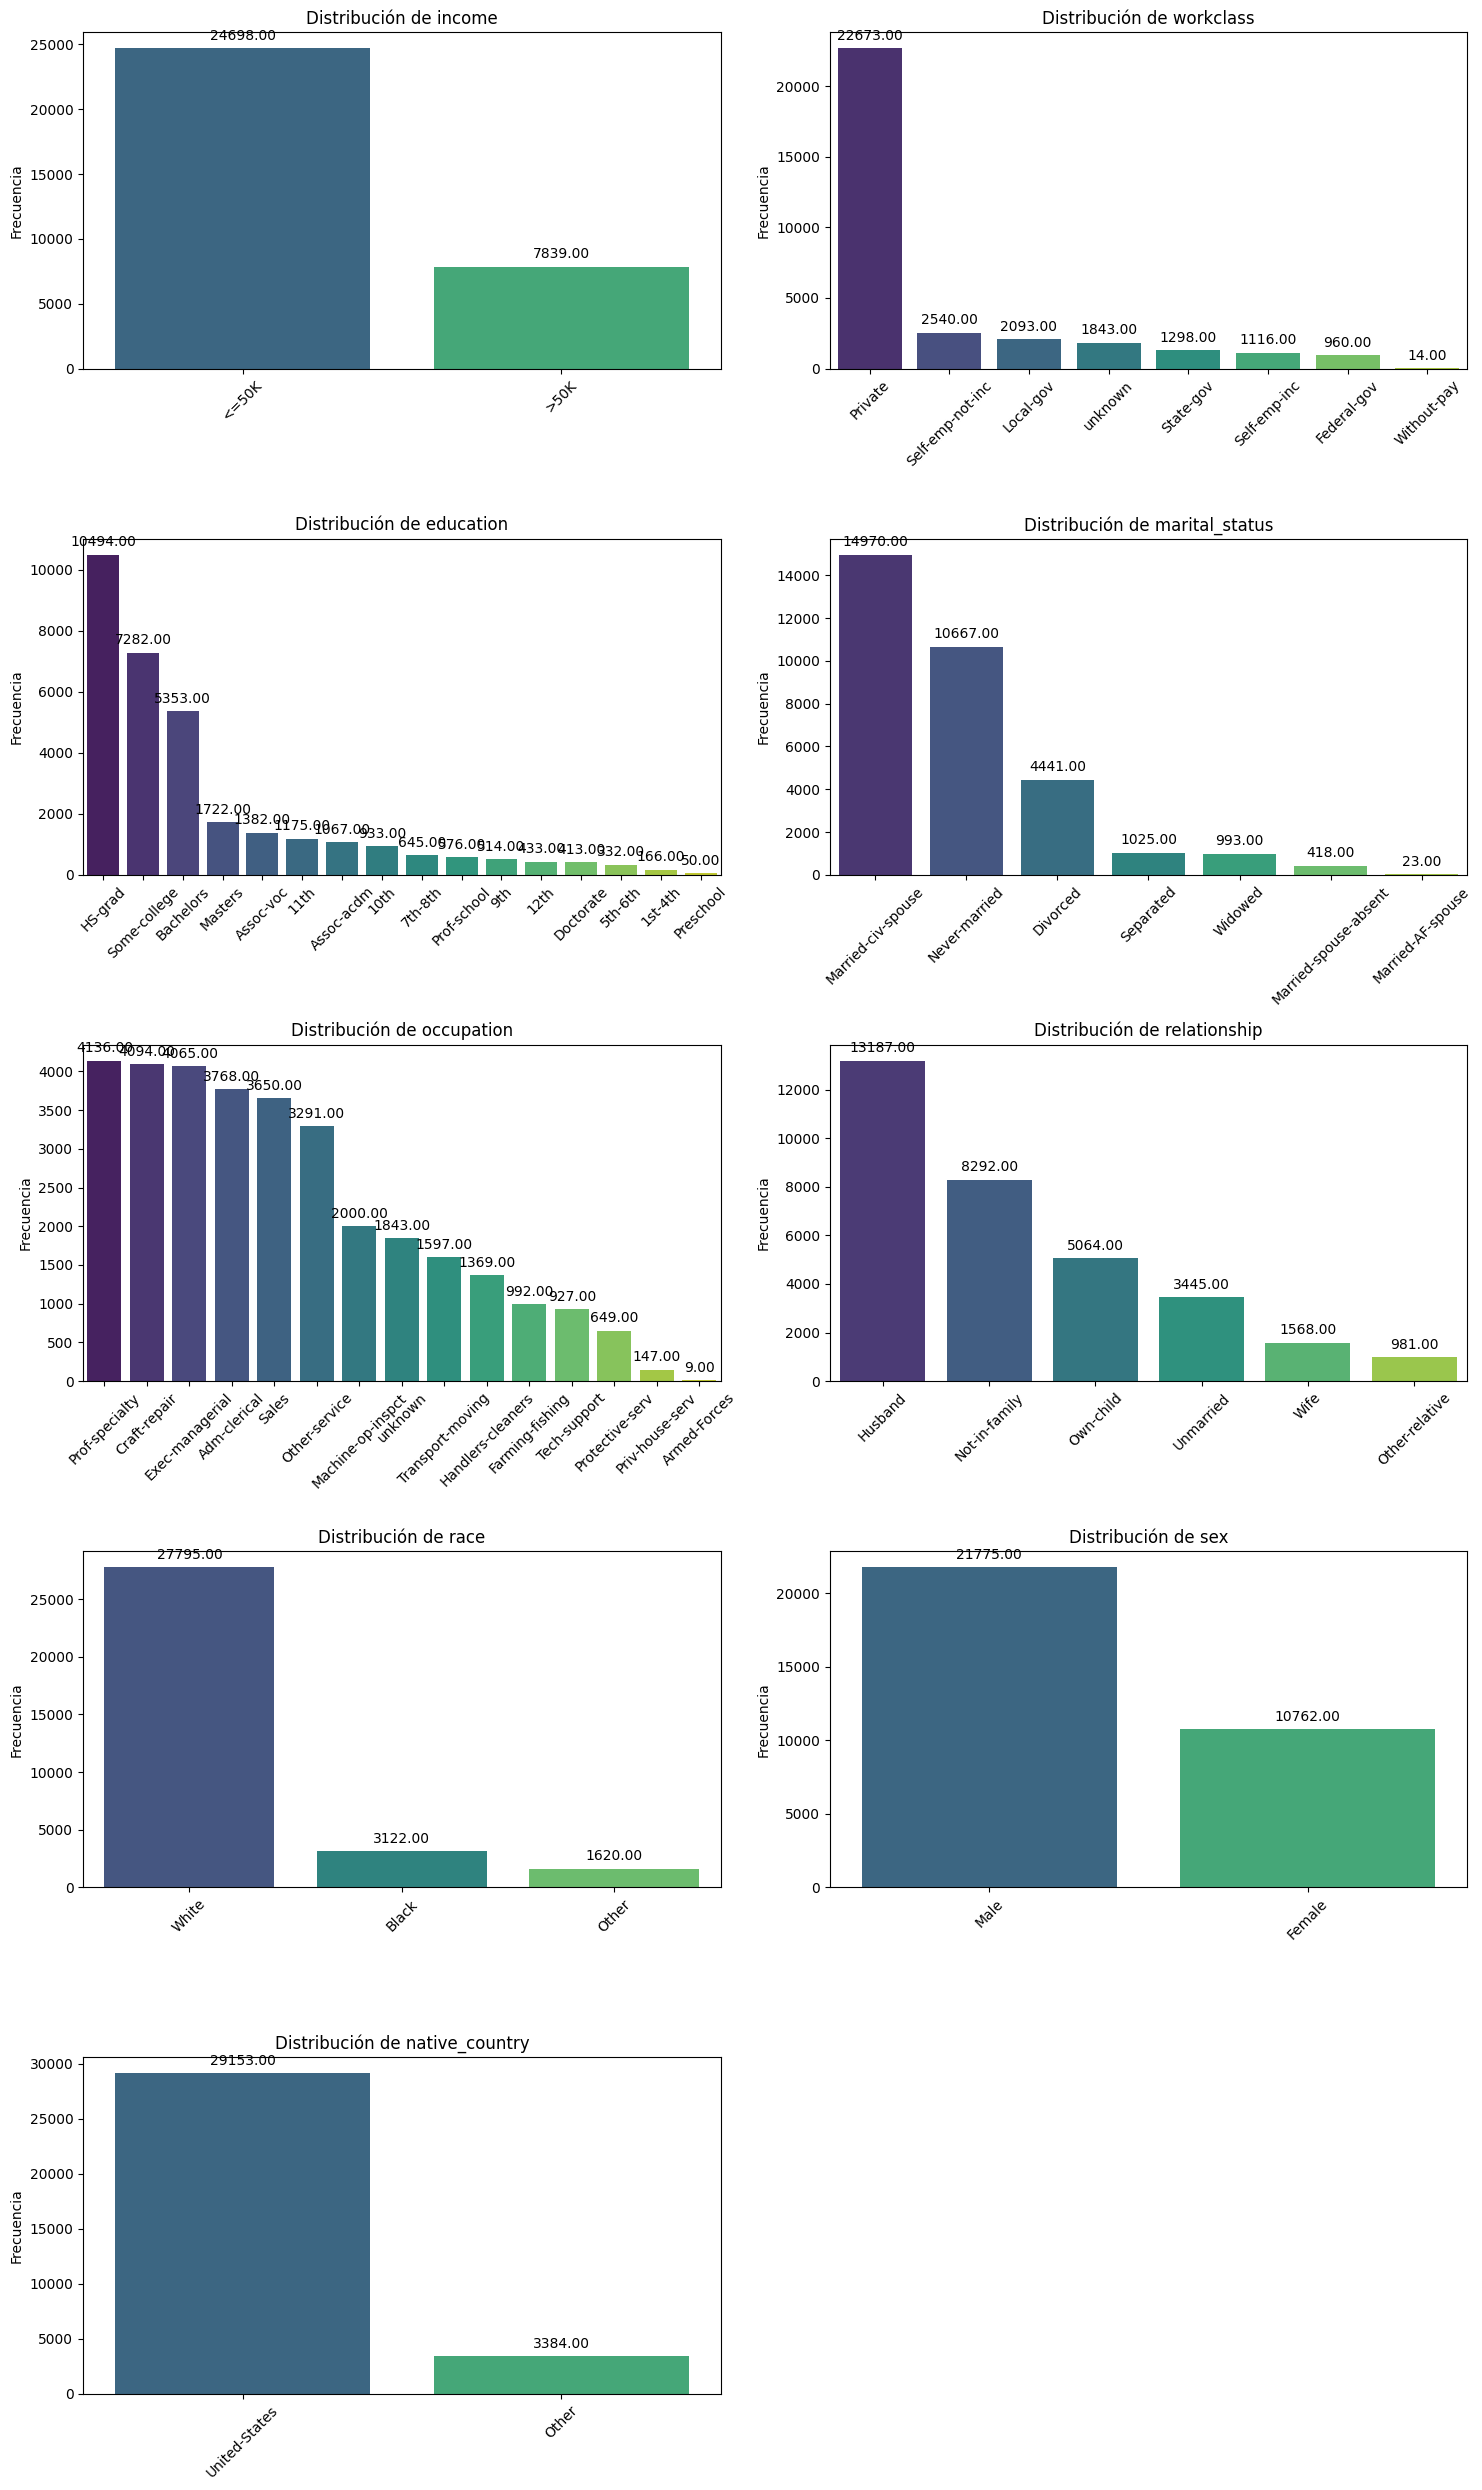

In [142]:
# we use the predefined function to plot all the categorical columns
# Utilizamos la función predefinida para representar gráficamente todas las variables categóricas
pinta_distribucion_categoricas(df,columnas_categoricas, mostrar_valores=True)

### Notas variable categoricas

#### income:

* Muy desbalanceado, con un 76% que gana menos de 50K y un 24% que gana más de 50K.
* Podría estar relacionado con un menor porcentaje de personas con niveles educativos más altos.

#### workclass:

* Dominado por el sector privado (70%), y el resto se reparte entre las demás categorías (entre 3% y 8%), siendo el valor without-pay un porcentaje mínimo del total.

#### education:

* Observamos una mayoría en niveles de estudios medios, siendo HS-Grad, Some-college y Bachelors los más frecuentes.
* La baja proporción de estudios de nivel superior podría explicar la menor cantidad de personas que ganan más de 50K.

#### marital_status:

* Podría ser interesante analizar cómo se relaciona esta variable con los ingresos. ¿Existe una relación significativa entre el ingreso y el estado civil?

#### occupation:

* Aquí observamos una distribución algo más equilibrada. Los valores varían entre 0% y 13%, y no hay una categoría que destaque de forma extremadamente dominante.

#### relationship:

* Se observa un mayor porcentaje del valor Husband y un menor porcentaje del valor Wife. Esto probablemente esté relacionado con el hecho de que, al observar la variable sex, hay aproximadamente el doble de hombres que de mujeres.
* Podría ser interesante analizar si existe una relación entre relationship y el ingreso (por ejemplo, si tener hijos se correlaciona con un menor ingreso, o si está relacionado con personas que ganan más dinero).

#### race:

* Se observa un claro predominio de la raza White (85%), mientras que Black representa solo el 10% y el 5% restante corresponde a un conjunto de otros grupos étnicos.
* Esto podría dificultar encontrar una correlación significativa entre raza e ingreso debido a la gran diferencia en las frecuencias.

#### sex:

* Categoría binaria.
* Hay el doble de hombres (67%) que de mujeres (33%).

#### native_country:

* Dominado por United-States (90%).
* El resto de los países, así como unknown, se agrupan en la categoría Other.


In [143]:
# Mostrar estadísticas descriptivas de las variables numéricas
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,10.081815,1078.443741,87.368227,40.440329
std,13.637984,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


(5, 2)


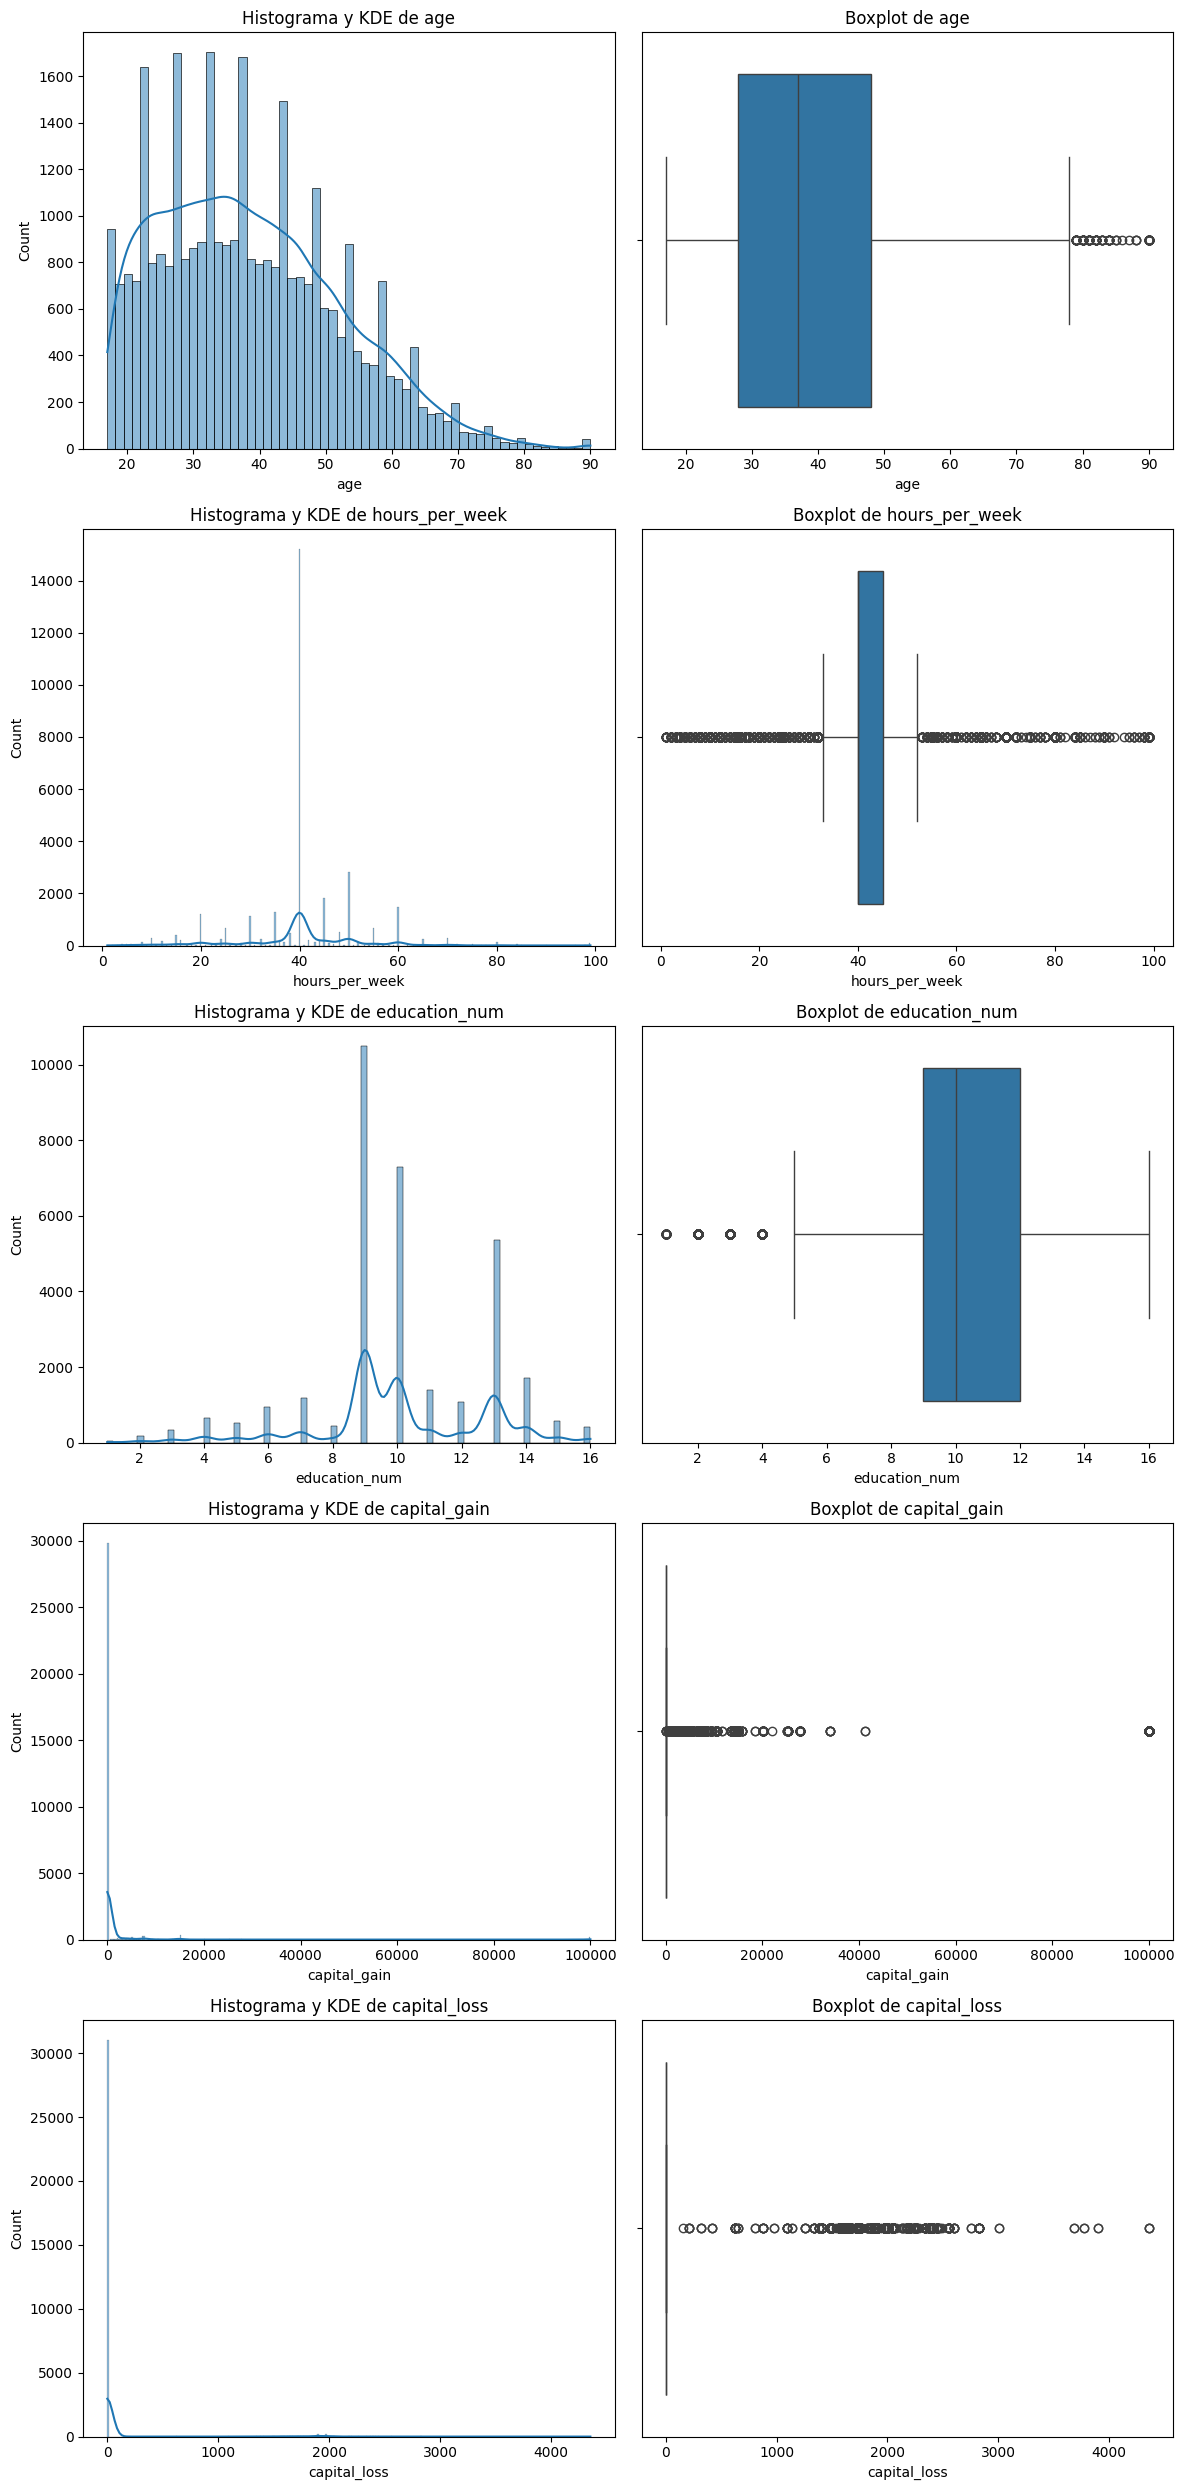

In [144]:
# we use the predefined function to plot all the categorical columns
# Utilizamos la función predefinida para representar gráficamente todas las variables categóricas
plot_combined_graphs(df,columnas_numericas)

In [145]:
# create new column "binned_hours_per_week"
# crear nueva columna "binned_hours_per_week"
bins = [0,19,39,40,59,df["hours_per_week"].max()]
labels = ["<20 (part-time)","20-39","40 (full-time)","41-59 (overtime)","60+ (long hours)"]

df["binned_hours_per_week"] = pd.cut(df["hours_per_week"],bins = bins, labels = labels, include_lowest=True)

In [146]:
# create new columns for "has_capital_gains","has_capital_losses" where the values are "Yes" or "No"
# creamos nuevas columnas para "has_capital_gains","has_capital_loss" donde los valores son "Yes" o "No"
df["has_capital_gain"] = np.where(df["capital_gain"] > 0, "Yes", "No")
df["has_capital_loss"] = np.where(df["capital_loss"] > 0, "Yes", "No")

### Notas sobre variables numéricas

#### age

* La distribución de la edad presenta una asimetría moderada a la derecha, con un pico entre aproximadamente los 25 y 50 años.
* El boxplot muestra algunos valores atípicos en el extremo superior que corresponden a personas de mayor edad, lo cual refleja una variación natural en la población, por lo que no se realizó ninguna transformación.

#### hours_per_week

* El histograma muestra una alta concentración alrededor de las 40 horas semanales, lo que refleja la jornada laboral estándar a tiempo completo.
* El boxplot muestra muchos valores atípicos tanto en horas muy bajas como muy altas, lo que dificulta su interpretación en una escala continua; por ello, se creó una columna agrupada (*binned*) para mejorar la interpretabilidad, manteniendo al mismo tiempo los valores numéricos originales.

#### education_num

* Los picos en el histograma muestran una concentración en niveles educativos específicos, principalmente en niveles educativos intermedios.
* El boxplot muestra valores atípicos en los niveles educativos más bajos, aunque estos corresponden a categorías educativas válidas.

#### capital_gain and capital_loss

* Los gráficos de estas variables presentan una fuerte asimetría a la derecha debido a la alta inflación de ceros y a la presencia de un pequeño número de valores muy elevados.
* Por esta razón, se crearon variables binarias para distinguir a los individuos que presentan alguna ganancia o pérdida de capital de aquellos que no presentan ninguna, lo que permite una mejor interpretación en análisis posteriores.


<h1 align="center">Analisis Bivariante</h1>

<h2 align="center">Education VS Income</h2>

### Education <-> Education_num mapping

The variable education_num is an ordinal numeric encoding of the categorical variable education, representing increasing levels of educational.

| education    | education_num |
| ------------ | ------------- |
| Preschool    | 1             |
| 1st–4th      | 2             |
| 5th–6th      | 3             |
| 7th–8th      | 4             |
| 9th          | 5             |
| 10th         | 6             |
| 11th         | 7             |
| 12th         | 8             |
| HS-grad      | 9             |
| Some-college | 10            |
| Assoc-voc    | 11            |
| Assoc-acdm   | 12            |
| Bachelors    | 13            |
| Masters      | 14            |
| Prof-school  | 15            |
| Doctorate    | 16            |


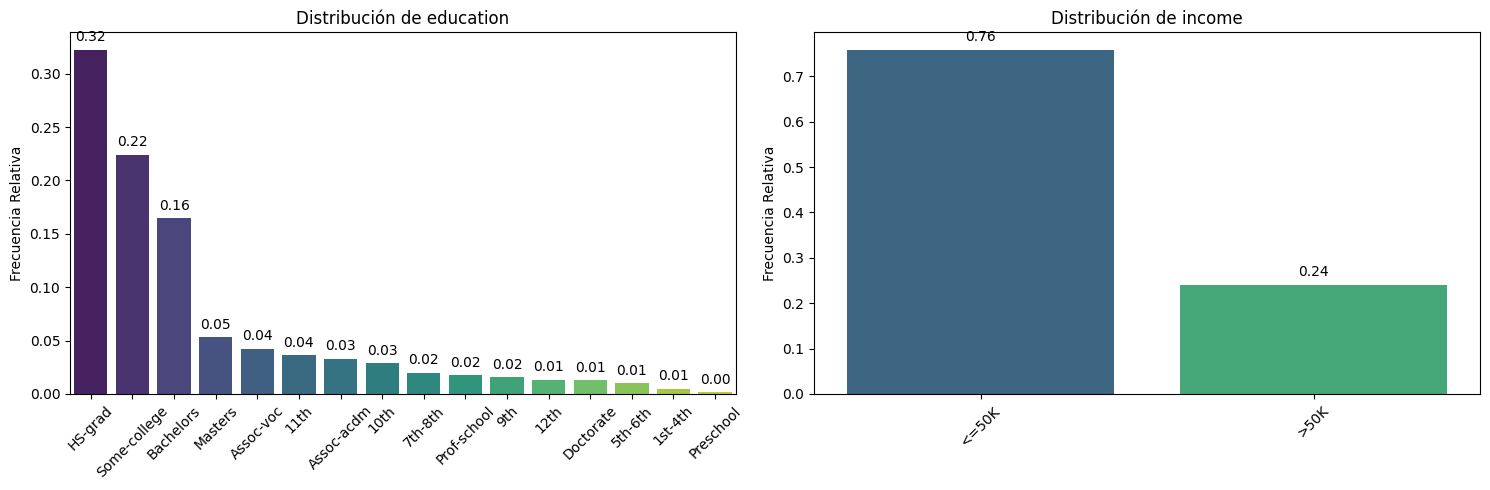

In [147]:
# representamos gráficamente las variables por seperados
pinta_distribucion_categoricas(df,["education","income"], relativa=True,mostrar_valores=True)

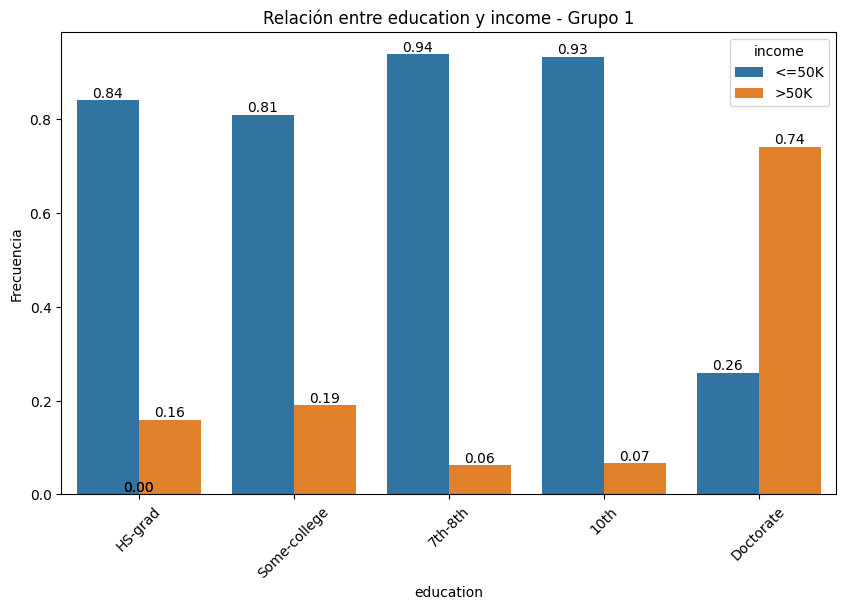

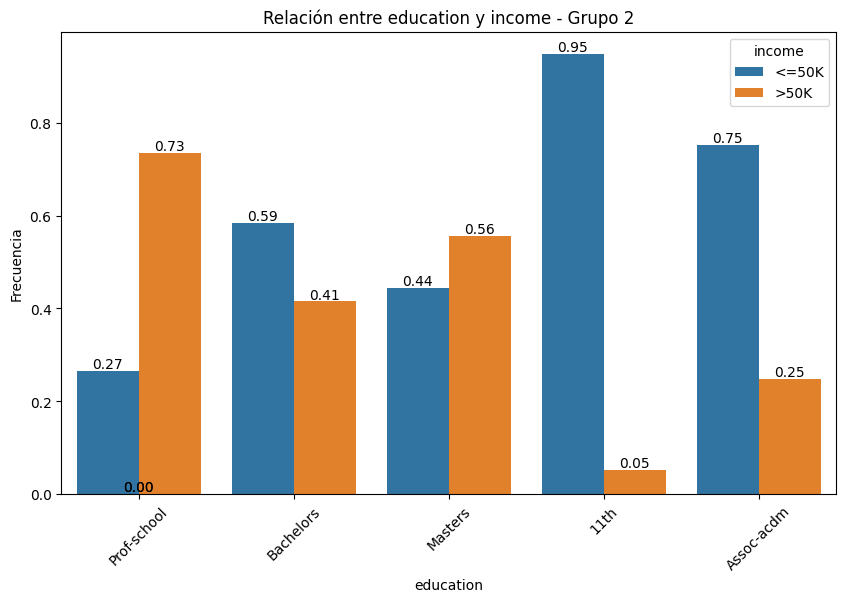

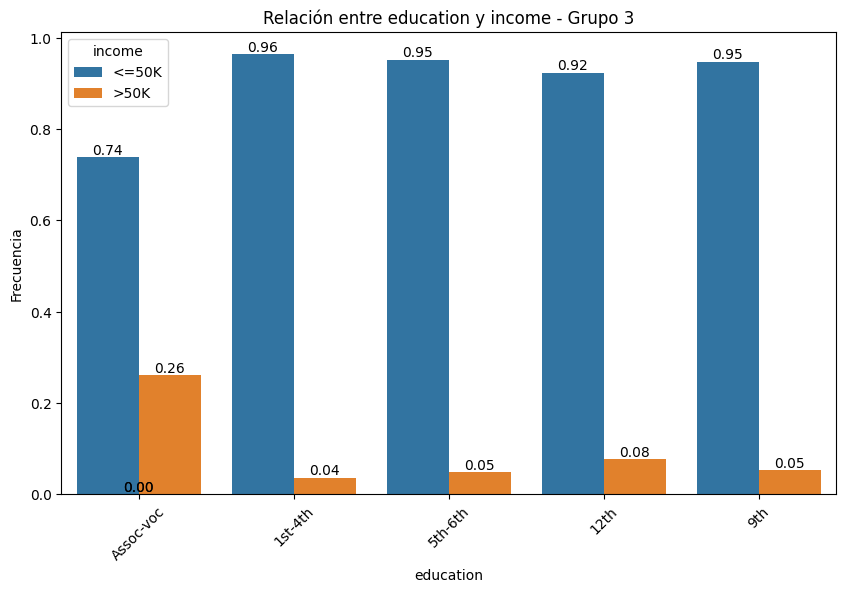

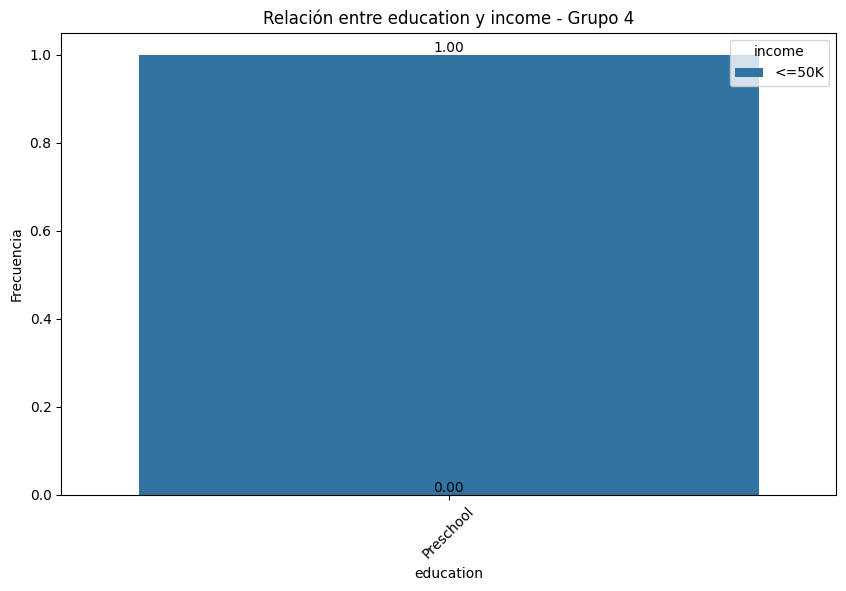

In [148]:
# representamos graficamente la relacion entre las variables
plot_categorical_relationship_fin(df,"education","income", show_values=True, relative_freq=True)

In [149]:
# definimos funcion para la tabla de contingencia
def tabla_contingencia(df,col1,col2):
    tabla_contingencia = pd.crosstab(df[col1], df[col2])
    return tabla_contingencia

In [150]:
# mostramos la tabla de contigencia de los variables
tabla_cont = tabla_contingencia(df,"income","education")
tabla_cont

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
income,,,,,,,,,,,,,,,,
<=50K,871,1115,400,160,316,605,487,802,1021,3132,107,8820,763,50,153,5896
>50K,62,60,33,6,16,40,27,265,361,2221,306,1674,959,0,423,1386


In [151]:
# # Aplicar la prueba Chi-cuadrado de independencia para evaluar la relación entre las variables categóricas
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_cont)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 4428.4046875547865
P-Value: 0.0
Grados de Libertad: 15
Tabla de Frecuencias Esperadas:
 [[ 708.21630759  891.91228448  328.67916526  126.00633125  252.01266251
   489.60291361  390.16418232  809.93226173 1049.0406614  4063.32464579
   313.49767956 7965.72554323 1307.12591819   37.95371423  437.22678796
  5527.5789409 ]
 [ 224.78369241  283.08771552  104.32083474   39.99366875   79.98733749
   155.39708639  123.83581768  257.06773827  332.9593386  1289.67535421
    99.50232044 2528.27445677  414.87408181   12.04628577  138.77321204
  1754.4210591 ]]


#### Notas
* Los niveles educativos más altos se asocian con una mayor probabilidad de percibir ingresos superiores a 50K.
* Las personas con niveles educativos más bajos presentan mayoritariamente ingresos iguales o inferiores a 50K.
* Los individuos con un título universitario (Bachelor’s) o superior tienen una probabilidad significativamente mayor de pertenecer al grupo de ingresos altos.
* Los títulos avanzados, como Doctorado y Professional School, muestran la asociación más fuerte con niveles de ingresos elevados.
* Los niveles educativos intermedios mejoran las perspectivas de ingresos, aunque no garantizan salarios más altos.
* En conjunto, la educación desempeña un papel clave en las diferencias de ingresos.


<h2 align="center">Age VS Income</h2>

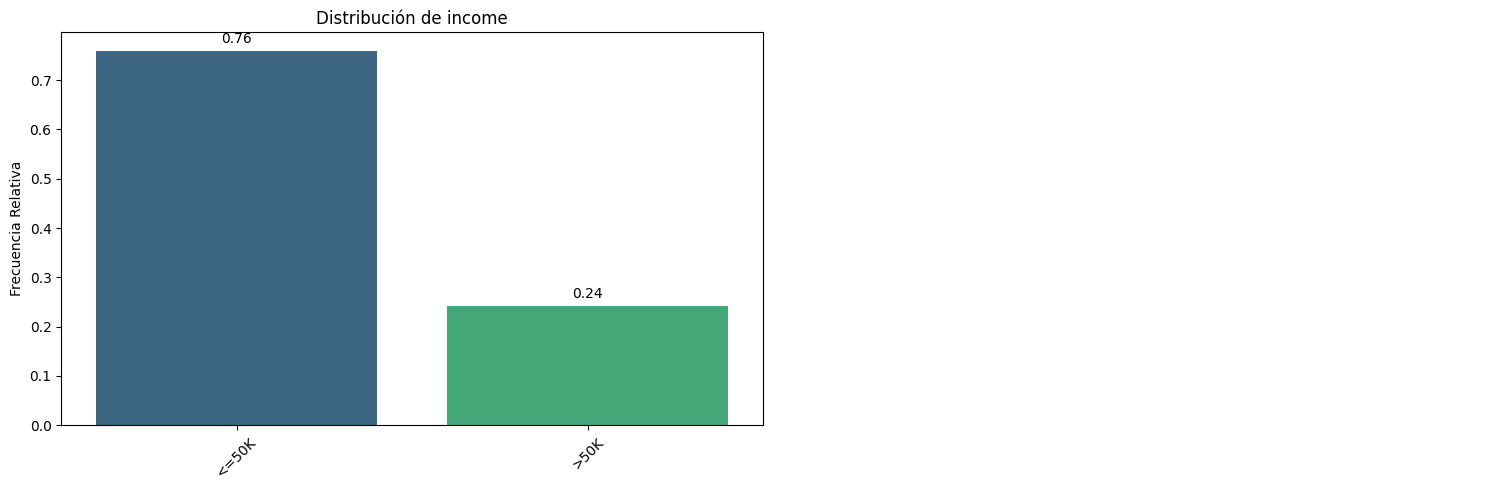

In [152]:
# representamos gráficamente la variable "income"
pinta_distribucion_categoricas(df,["income"],relativa=True,mostrar_valores=True)

(2,)


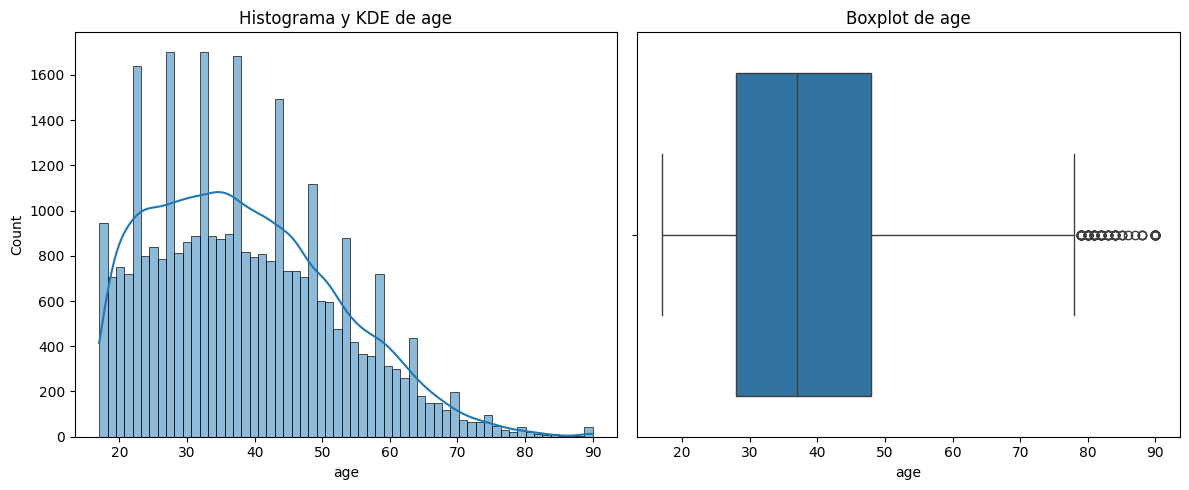

In [153]:
# representamos graficamente la variable "age"
plot_combined_graphs(df,["age"])

In [154]:
# mostramos estadísticas descriptivas de las variables 
df.groupby("income")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24698.0,36.787392,14.017335,17.0,25.0,34.0,46.0,90.0
>50K,7839.0,44.250925,10.520102,19.0,36.0,44.0,51.0,90.0


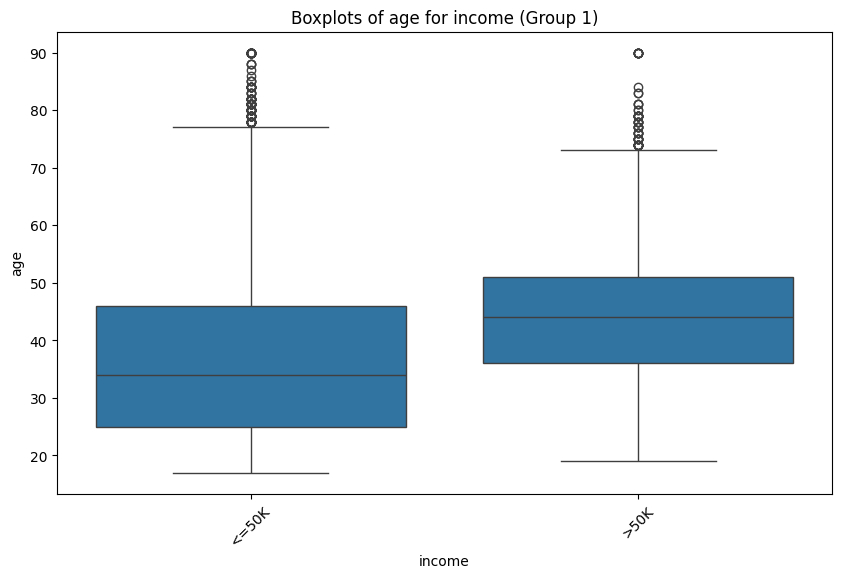

In [155]:
# plot boxplots
plot_grouped_boxplots(df,"income","age")

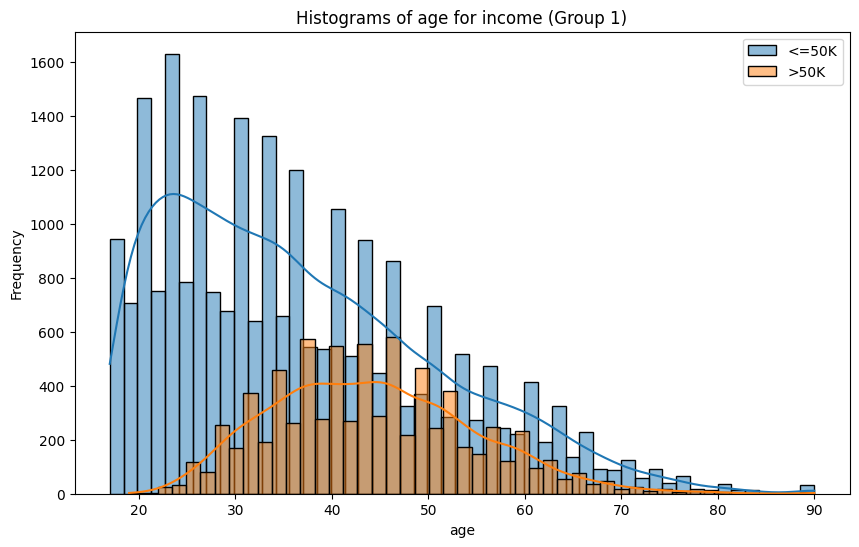

In [156]:
# plot histograms
plot_grouped_histograms(df,"income","age",2)

In [157]:
# importamos mannwhitneyu de scipy.stats
from scipy.stats import mannwhitneyu

In [158]:
# creamos dos grupos para el funcion mannwhitneyu

low_income = df.loc[df["income"] == "<=50K"]["age"]
high_income = df.loc[df["income"] == ">50K"]["age"]

In [159]:
# apply test
# aplicamos el test
u_stat, p_valor = mannwhitneyu(low_income, high_income)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 61147488.0
Valor p: 0.0


### Notas "edad" vs "ingresos"

* En el resumen estadístico se observa que el grupo con ingresos superiores a 50K presenta una edad media mayor que el grupo con ingresos iguales o inferiores a 50K.
* La edad mediana del grupo de ingresos altos es de 44 años, frente a 34 años en el grupo de ingresos bajos.
* Aunque ambos grupos incluyen individuos de edad avanzada (hasta 90 años), los grupos de menor edad son más frecuentes en el grupo de ingresos bajos.
* La aplicación de la prueba de Mann-Whitney U devuelve un valor p < 0,001, lo que refuerza las conclusiones visuales y muestra que existe una asociación estadísticamente significativa entre la variable edad y los ingresos.
* Esta asociación probablemente refleja la acumulación de experiencia a lo largo del tiempo y la progresión profesional.


<h2 align="center">binned_hours_per_week VS income</h2>

c:\Users\nicho\Documents\GitHub\EDA_Factores_nivel_ingresos\src\utils\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


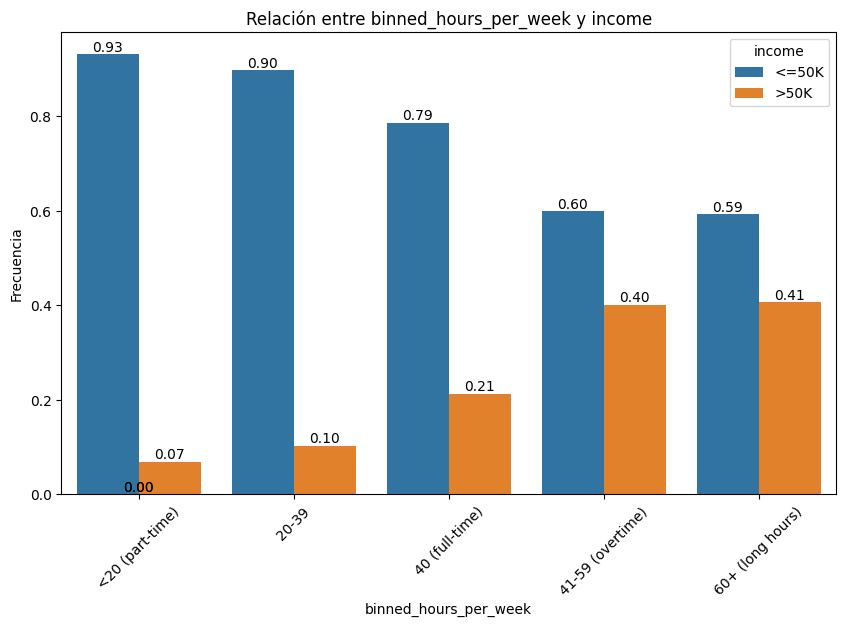

In [196]:
# # representamos graficamente la relacion entre las variables
plot_categorical_relationship_fin(df,"binned_hours_per_week","income",relative_freq=True,show_values=True)

In [161]:
# mostramos la tabla de contigencia de los variables
tabla_cont_hours = tabla_contingencia(df,"binned_hours_per_week","income")
tabla_cont_hours

income,<=50K,>50K
binned_hours_per_week,,
<20 (part-time),1583,117
20-39,5436,621
40 (full-time),11958,3246
41-59 (overtime),4188,2803
60+ (long hours),1533,1052


In [162]:
# Aplicar la prueba Chi-cuadrado de independencia para evaluar la relación entre las variables
chi2, p, dof, expected = chi2_contingency(tabla_cont_hours)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 2340.7926138402013
P-Value: 0.0
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[ 1290.42628392   409.57371608]
 [ 4597.71294219  1459.28705781]
 [11540.96542398  3663.03457602]
 [ 5306.68832406  1684.31167594]
 [ 1962.20702585   622.79297415]]


### Notas binned_hours_per_week vs ingresos

* Se observa que los intervalos con menos horas trabajadas (trabajo a tiempo parcial) están dominados por el grupo de ingresos bajos. Incluso el grupo de trabajo a tiempo completo está mayoritariamente compuesto por personas con ingresos bajos, aunque en este caso ya se aprecia un aumento del grupo de ingresos altos.
* Es en los tramos de mayor número de horas trabajadas (“overtime” y “long hours”) donde se observa un incremento significativo en la frecuencia del grupo de ingresos altos.
* Estos resultados probablemente están relacionados con dinámicas laborales habituales:
    + El trabajo a tiempo parcial limita los ingresos, y suele estar asociado a empleos por horas o con salarios más bajos.
    + Los trabajos a tiempo completo y con horas extra suelen ofrecer salarios más elevados, generalmente vinculados a puestos asalariados.
    + Las jornadas más largas suelen asociarse a cargos directivos o profesiones cualificadas, con mayor probabilidad de superar determinados umbrales de ingresos.
* La prueba Chi-cuadrado devuelve un valor p < 0,001, lo que indica la existencia de una asociación estadísticamente significativa.
* Los resultados muestran que las proporciones de ingresos cambian de forma consistente y sustancial entre las distintas categorías de horas trabajadas, lo que refleja dinámicas estructuradas del mercado laboral más que una variación aleatoria.


<h2 align="center">race VS income</h2>

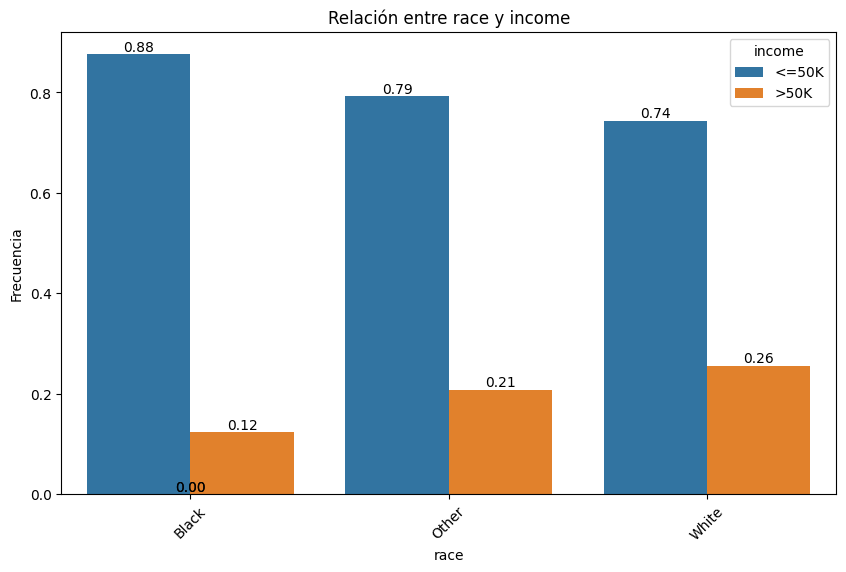

In [163]:
# representamos graficamente la relacion entre las variables
plot_categorical_relationship_fin(df,"race","income", relative_freq=True,show_values=True)

In [164]:
# mostramos la tabla de contingencia
tabla_cont_race = tabla_contingencia(df,"race","income")
tabla_cont_race

income,<=50K,>50K
race,,
Black,2735,387
Other,1283,337
White,20680,7115


In [165]:
# aplicar l aprueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cont_race)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 277.59469843053785
P-Value: 5.261106981519217e-61
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 2369.82991671   752.17008329]
 [ 1229.70034115   390.29965885]
 [21098.46974214  6696.53025786]]


### Notas "raza" vs "ingresos"

* La mayoría de los individuos de todos los grupos raciales presentan ingresos iguales o inferiores a 50K.
* Se observa que la proporción de personas con ingresos superiores a 50K es menor en el grupo de individuos negros, seguida por el grupo “Other”, mientras que los individuos blancos presentan la mayor proporción de personas con ingresos altos.
* La prueba Chi-cuadrado devuelve un valor p < 0,001, lo que refuerza la interpretación visual del gráfico y muestra que existe una asociación estadísticamente significativa entre las variables raza e ingresos.


<h2 align="center">sex VS income</h2>

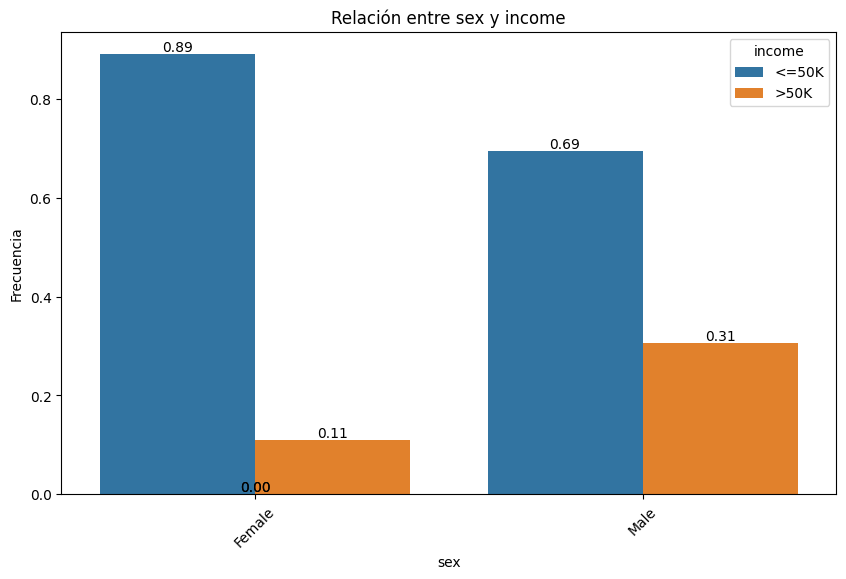

In [166]:
# representamos graficamente la relacion entre las variables
plot_categorical_relationship_fin(df,"sex","income",relative_freq=True,show_values=True)

In [167]:
# mostramos la tabla de contingencia
tabla_cont_sex = tabla_contingencia(df,"sex","income")
tabla_cont_sex

income,<=50K,>50K
sex,,
Female,9583,1179
Male,15115,6660


In [168]:
# aplicamos la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cont_sex)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1516.5397108545465
P-Value: 0.0
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 8169.15745152  2592.84254848]
 [16528.84254848  5246.15745152]]


### Notas "sexo" vs "ingresos"

* El gráfico muestra que, en ambos sexos, la mayoría de los individuos presentan ingresos iguales o inferiores a 50K.
* Sin embargo, se observa claramente que el porcentaje de hombres (31 %) con ingresos superiores a 50K es considerablemente mayor que el de mujeres (11 %).
* La prueba Chi-cuadrado refleja esta observación, con un valor p < 0,001, lo que indica la existencia de una asociación estadísticamente significativa.


<h2 align="center"> occupation VS income</h2>

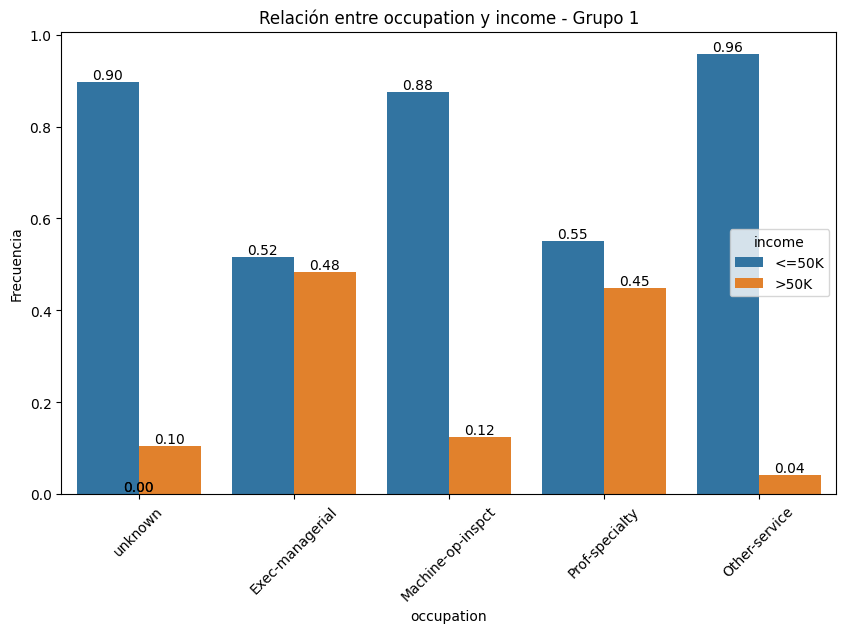

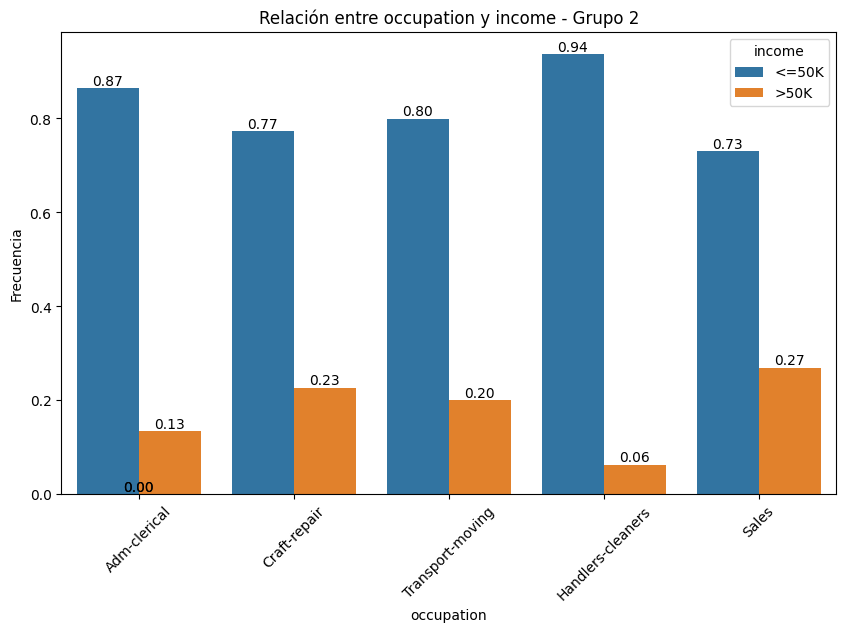

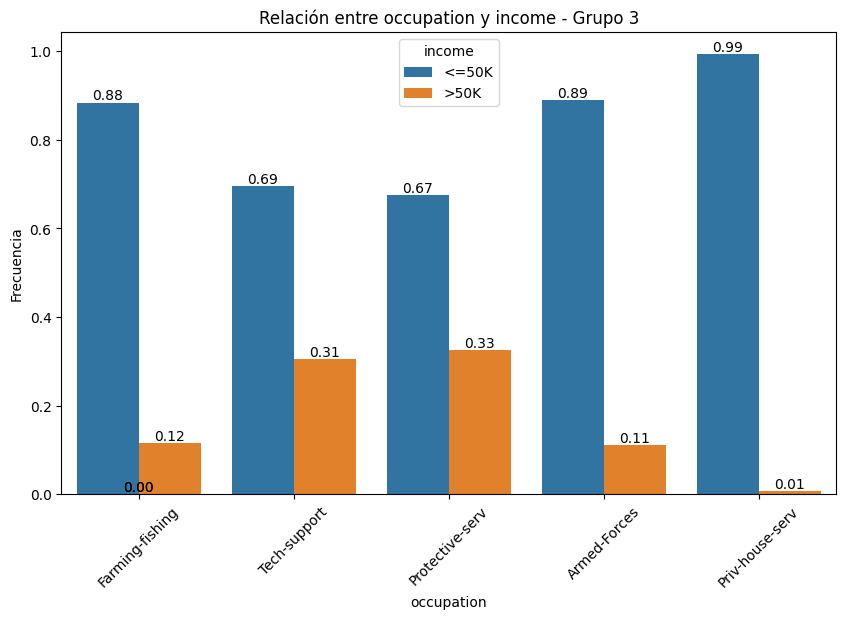

In [169]:
# representamos graficamente la relacion entre las variables
plot_categorical_relationship_fin(df,"occupation","income",relative_freq=True,show_values=True)

In [170]:
# mostramos la tabla de contingencia
tabla_cont_occupation = tabla_contingencia(df,"occupation","income")
tabla_cont_occupation

income,<=50K,>50K
occupation,,
Adm-clerical,3261,507
Armed-Forces,8,1
Craft-repair,3165,929
Exec-managerial,2097,1968
Farming-fishing,877,115
Handlers-cleaners,1283,86
Machine-op-inspct,1751,249
Other-service,3154,137
Priv-house-serv,146,1


In [171]:
# aplicamos prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cont_occupation)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 4030.209207468489
P-Value: 0.0
Grados de Libertad: 14
Tabla de Frecuencias Esperadas:
 [[2.86019190e+03 9.07808095e+02]
 [6.83166856e+00 2.16833144e+00]
 [3.10765012e+03 9.86349879e+02]
 [3.08563697e+03 9.79363033e+02]
 [7.53001690e+02 2.38998310e+02]
 [1.03917270e+03 3.29827304e+02]
 [1.51814857e+03 4.81851431e+02]
 [2.49811347e+03 7.92886529e+02]
 [1.11583920e+02 3.54160802e+01]
 [3.13953124e+03 9.96468759e+02]
 [4.92639211e+02 1.56360789e+02]
 [2.77062114e+03 8.79378861e+02]
 [7.03661862e+02 2.23338138e+02]
 [1.21224163e+03 3.84758367e+02]
 [1.39897391e+03 4.44026093e+02]]


### Notas "ocupación" vs "ingresos"

* Al analizar los gráficos, se identifican algunos patrones clave: determinadas ocupaciones presentan una alta proporción de individuos con ingresos superiores a 50K, mientras que otras muestran un claro predominio del grupo de ingresos bajos.
* Las ocupaciones con una alta proporción de individuos que perciben más de 50 000 $ incluyen:
  + Exec-managerial (~48 %)
  + Prof-specialty (~45 %)
  + Tech-support (~31 %)
  + Protective-serv (~33 %)

Este patrón es coherente con el hecho de que las ocupaciones mejor remuneradas suelen requerir habilidades especializadas, niveles educativos más altos y responsabilidades de gestión.

* Las ocupaciones con una elevada concentración en el grupo de ingresos bajos incluyen:
  + Priv-house-serv (~99 % ≤ 50K)
  + Other-service (~96 % ≤ 50K)
  + Handlers-cleaners (~94 % ≤ 50K)
  + Machine-op-inspct (~88 % ≤ 50K)
  + Farming-fishing (~88 % ≤ 50K)
  + Adm-clerical (~87 % ≤ 50K)

Las ocupaciones con menor nivel salarial suelen estar asociadas a trabajos manuales o de servicios, presentan con mayor frecuencia salarios por horas en lugar de sueldos fijos y, en general, ofrecen menos oportunidades de promoción.


<h2 align="center">workclass VS income</h1>

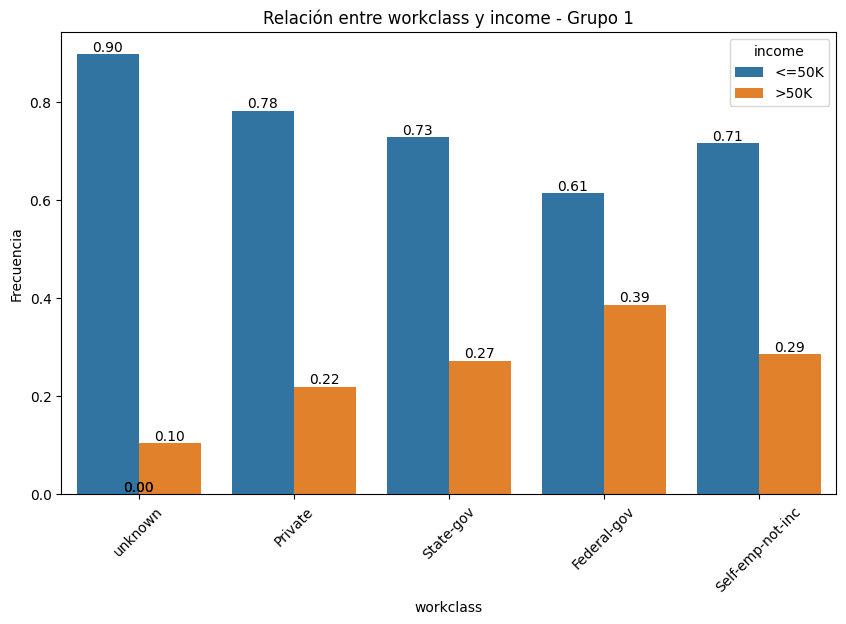

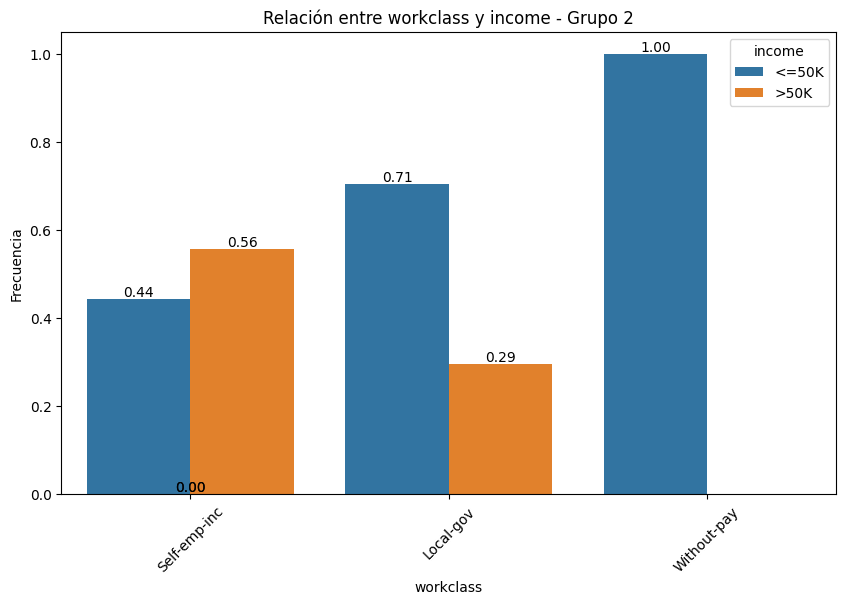

In [172]:
# representar la relacion entre las variables
plot_categorical_relationship_fin(df,"workclass","income", relative_freq=True,show_values=True)

In [173]:
# mostramos tabla de contingencia
tabla_cont_workclass = tabla_contingencia(df,"workclass","income")
tabla_cont_workclass

income,<=50K,>50K
workclass,,
Federal-gov,589,371
Local-gov,1476,617
Private,17712,4961
Self-emp-inc,494,622
Self-emp-not-inc,1816,724
State-gov,945,353
Without-pay,14,0
unknown,1652,191


In [174]:
# prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cont_workclass)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1044.2834908729276
P-Value: 3.2486011755106817e-221
Grados de Libertad: 7
Tabla de Frecuencias Esperadas:
 [[7.28711313e+02 2.31288687e+02]
 [1.58874248e+03 5.04257522e+02]
 [1.72104913e+04 5.46250874e+03]
 [8.47126902e+02 2.68873098e+02]
 [1.92804868e+03 6.11951317e+02]
 [9.85278421e+02 3.12721579e+02]
 [1.06270400e+01 3.37296001e+00]
 [1.39897391e+03 4.44026093e+02]]


### Notas "workclass" vs "ingresos"

* Al observar los gráficos, se aprecia que existen categorías de workclass con una proporción notablemente mayor de individuos con ingresos altos. Entre ellas se encuentran:
    + self-emp-inc (trabajadores por cuenta propia incorporados, como propietarios de empresas, etc.) (~54 %)
    + federal-gov (presenta una mayor proporción de ingresos altos en comparación con otros niveles de empleo gubernamental)
    + state-gov
    + local-gov

La explicación de este patrón puede estar relacionada con el hecho de que la categoría self-emp-inc suele corresponder a propietarios de negocios o actividades de mayor escala. Por otro lado, los empleos en el sector público tienden a ofrecer mayor estabilidad laboral, puestos a tiempo completo y ben


<h2 align="center">native_country VS income</h2>

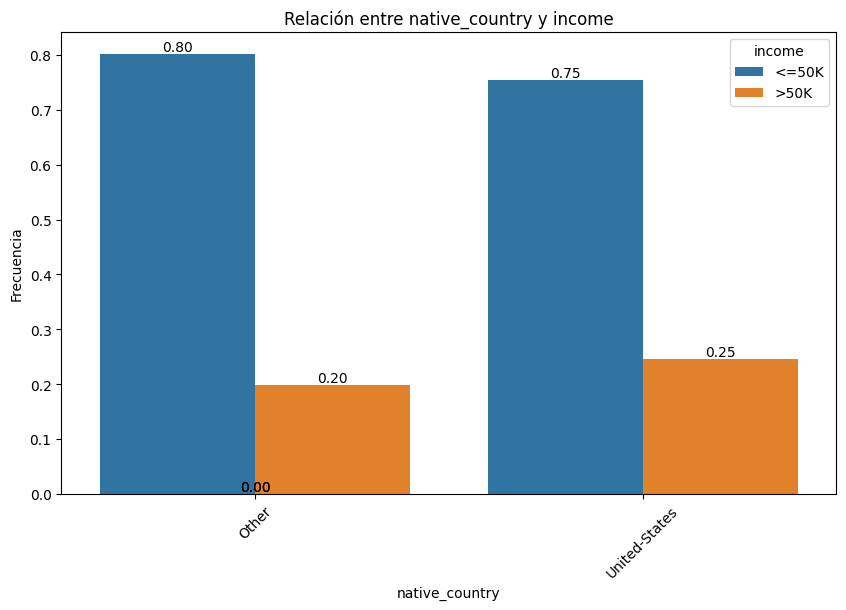

In [175]:
# representar la relacion entre las variables
plot_categorical_relationship_fin(df,"native_country","income", relative_freq=True,show_values=True)

In [176]:
# tabla de contingencia
tabla_cont_country = tabla_contingencia(df,"native_country","income")
tabla_cont_country

income,<=50K,>50K
native_country,,
Other,2714,670
United-States,21984,7169


In [177]:
# prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cont_country)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 37.80848904292614
P-Value: 7.804143463331444e-10
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 2568.70737929   815.29262071]
 [22129.29262071  7023.70737929]]


### Notas "native_country" vs "ingresos"

* Al observar los gráficos, los resultados parecen bastante similares entre los grupos; no obstante, se aprecia que el grupo cuyo país de origen es Estados Unidos presenta una mayor proporción de individuos con ingresos superiores a 50K.
* La prueba Chi-cuadrado confirma que existe una asociación estadísticamente significativa y que los resultados no son independientes.


<h2 align="center">marital_status VS income</h2>

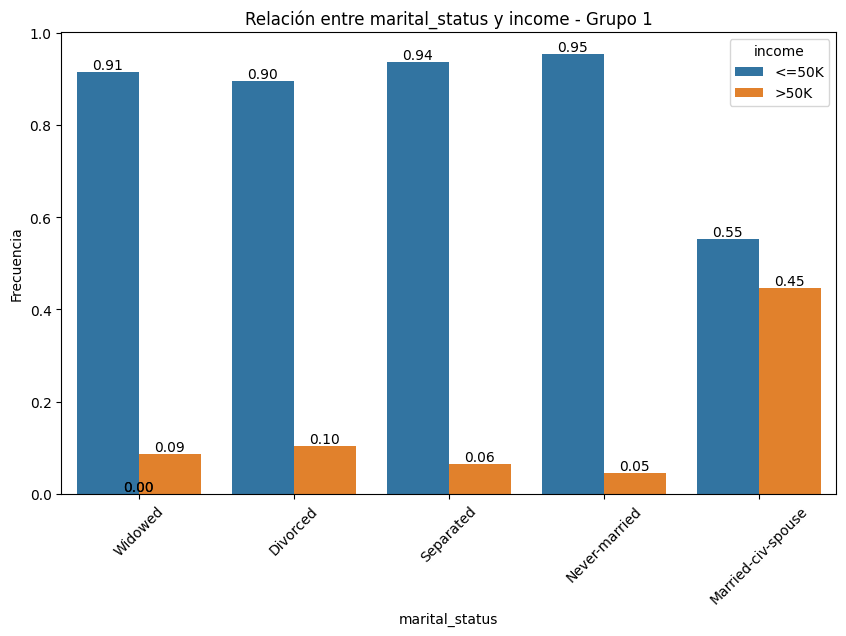

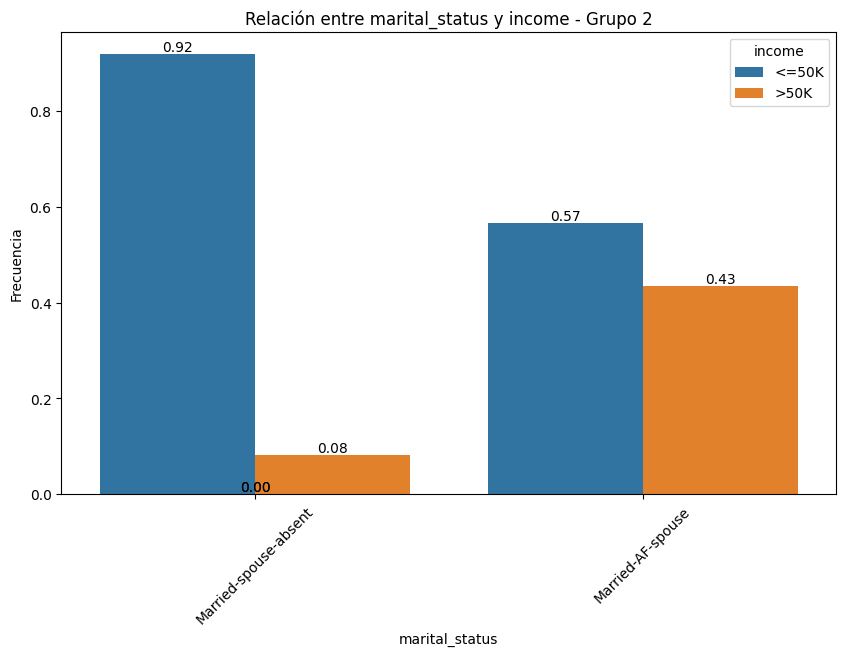

In [178]:
# representamos la relacion entre las variables
plot_categorical_relationship_fin(df,"marital_status","income",relative_freq=True,show_values=True)

In [179]:
# tabla de contingencia
tabla_cont_marital_status = tabla_contingencia(df,"marital_status","income")
tabla_cont_marital_status

income,<=50K,>50K
marital_status,,
Divorced,3978,463
Married-AF-spouse,13,10
Married-civ-spouse,8280,6690
Married-spouse-absent,384,34
Never-married,10176,491
Separated,959,66
Widowed,908,85


In [180]:
# prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cont_marital_status)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 6510.332126761207
P-Value: 0.0
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[3.37104890e+03 1.06995110e+03]
 [1.74587085e+01 5.54129145e+00]
 [1.13633420e+04 3.60665796e+03]
 [3.17293051e+02 1.00706949e+02]
 [8.09704539e+03 2.56995461e+03]
 [7.78051142e+02 2.46948858e+02]
 [7.53760765e+02 2.39239235e+02]]


### Notas "estado_civil" vs "ingresos"

* Al analizar la relación entre el estado civil y los ingresos, se observa que existen dos grupos asociados a una mayor proporción de individuos con ingresos superiores a 50K: married-civ-spouse y married-AF-spouse.
* Este patrón puede explicarse por el hecho de que los hogares con personas casadas suelen contar con dos fuentes de ingresos, combinando o compartiendo los recursos del hogar.
* El estado civil probablemente está correlacionado con la edad, una mayor experiencia laboral y una posible estabilidad profesional, factores que previamente se han observado asociados a mayores niveles de ingresos.
* En el caso de married-AF-spouse, pueden aplicarse algunas de las mismas consideraciones; sin embargo, los resultados parecen más pronunciados debido a que el tamaño de este grupo es muy reducido y está compuesto por un número limitado de individuos.


<h2 align="center">has_capital_gain VS income</h2>

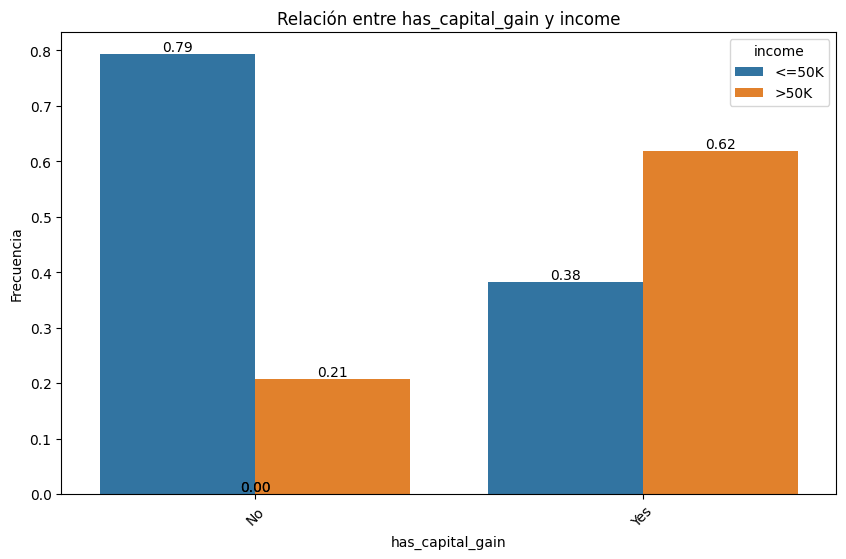

In [181]:
# representamos la relacion entre las variables
plot_categorical_relationship_fin(df,"has_capital_gain","income", relative_freq=True,show_values=True)

In [182]:
# tabla de contingencia
tabla_cont_gain = tabla_contingencia(df,"has_capital_gain","income")
tabla_cont_gain

income,<=50K,>50K
has_capital_gain,,
No,23663,6162
Yes,1035,1677


In [183]:
# prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cont_gain)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 2302.417800784773
P-Value: 0.0
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[22639.39054  7185.60946]
 [ 2058.60946   653.39054]]


### Notas "has_capital_gain" vs "ingresos"

* Al observar el gráfico, se aprecia que la mayoría (79 %) de los individuos que no presentan ganancias de capital tienen ingresos iguales o inferiores a 50K, mientras que solo un 21 % supera los 50K.
* Por el contrario, en el grupo de individuos que sí presentan ganancias de capital, la mayoría (62 %) percibe ingresos superiores a 50K, y únicamente un 38 % obtiene ingresos iguales o inferiores a 50K.


<h1 align="center">Analisis multivariante</h1>

<h2 align="center">"age","hours_per_week" y "income"</h2>

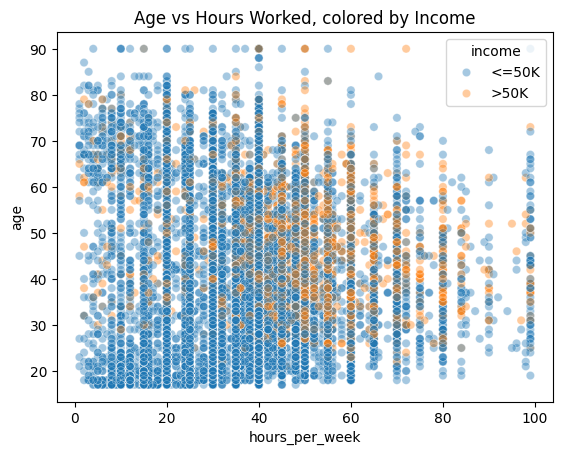

In [ ]:
# representamos la relacion entre la variable en un scatterplot usando seaborn
sns.scatterplot(
    data=df,
    y='age',
    x='hours_per_week',
    hue='income',
    alpha=0.4)
plt.title('Age vs Hours Worked, colored by Income')
plt.show()

### Conclusión

El gráfico muestra un alto grado de solapamiento entre los dos grupos de ingresos al analizar la variable edad, lo que sugiere que la edad por sí sola no es un indicador sólido del nivel de ingresos. En contraste, las personas con ingresos superiores a 50K se concentran con mayor frecuencia entre aquellas que trabajan un mayor número de horas, especialmente en el rango de 40 a 60 horas semanales. Son muy pocos los individuos con ingresos altos que trabajan menos de 30 horas, independientemente de su edad. El mayor número de personas con ingresos elevados se observa en individuos en etapas intermedias de su carrera profesional (aproximadamente entre los 35 y 55 años) que trabajan a tiempo completo o más, lo que indica que los ingresos están influidos por una combinación de edad y horas trabajadas, y no por cada uno de estos factores de forma aislada.


<h2 align="center">"education","sex" and "income"</h2>

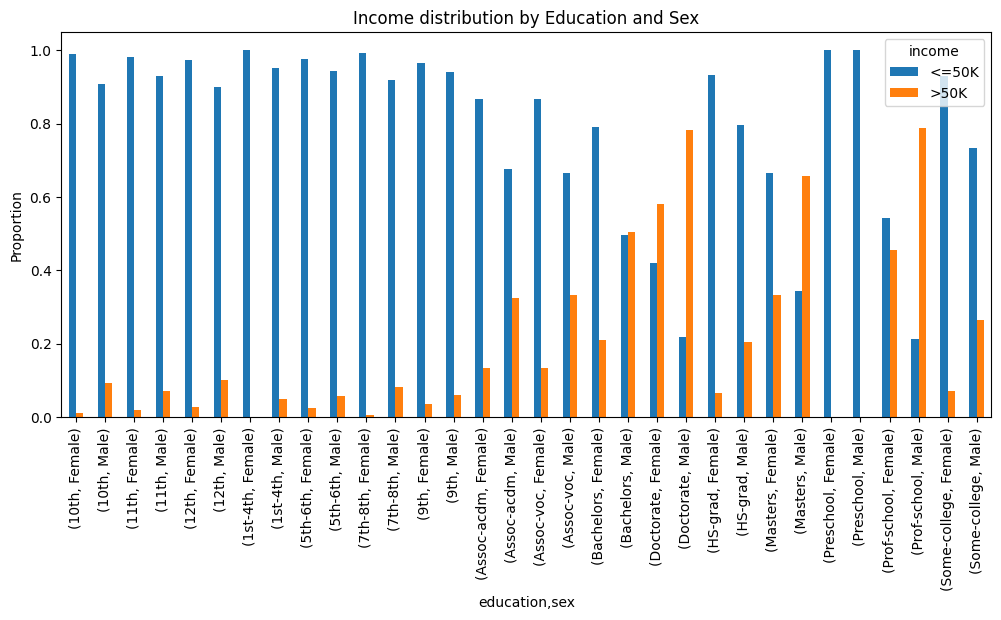

In [185]:
# representamos la relacion entre las variables via un barplot 
(pd.crosstab(
        [df['education'], df['sex']],
        df['income'],
        normalize='index'
    )
    .plot(kind='bar', figsize=(12,5))
)

plt.ylabel('Proportion')
plt.title('Income distribution by Education and Sex')
plt.show()

### Conclusión

El gráfico muestra diferencias claras en la distribución de los ingresos según el nivel educativo y el sexo. En los niveles educativos más bajos, la gran mayoría tanto de hombres como de mujeres perciben ingresos iguales o inferiores a 50K, siendo muy pocos los individuos que alcanzan el grupo de ingresos altos. A medida que aumenta el nivel educativo, también se incrementa la proporción de personas que ganan más de 50K, especialmente a partir del nivel de Bachelor’s.

En prácticamente todas las categorías educativas, los hombres presentan una mayor probabilidad que las mujeres de percibir ingresos superiores a 50 000 $, incluso cuando cuentan con el mismo nivel educativo. Esta brecha se vuelve más evidente en los niveles educativos más altos, como Master’s, Professional School y Doctorate. En conjunto, los resultados sugieren que, aunque la educación superior incrementa de forma significativa la probabilidad de obtener ingresos elevados, también existe una diferencia sistemática por sexo en los resultados salariales dentro de un mismo nivel educativo.


<h2 align="center">"marital_status","sex" y "income"</h2>

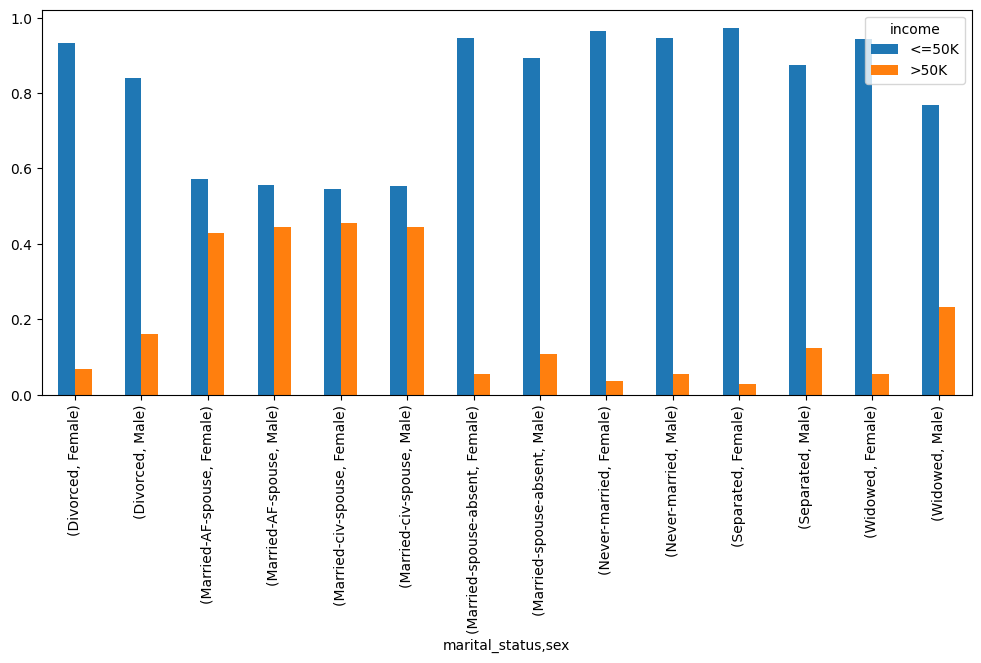

In [186]:
# representamos la relacion entre las variables
pd.crosstab(
    [df["marital_status"], df["sex"]],
    df["income"],
    normalize="index"
).plot(kind='bar', figsize=(12,5))
plt.show()

#### Conclusión

* Las personas casadas, especialmente los hombres, presentan la mayor proporción de ingresos superiores a 50K.
* Los grupos de personas nunca casadas, divorciadas, separadas y viudas se concentran mayoritariamente en la categoría de ingresos iguales o inferiores a 50K.
* Los hombres obtienen de forma consistente ingresos más altos que las mujeres dentro de un mismo estado civil.
* Se observa un fuerte efecto de interacción entre el estado civil y el sexo en relación con los ingresos.


<h2 align="center">"education","hours per week" and "income"</h2>

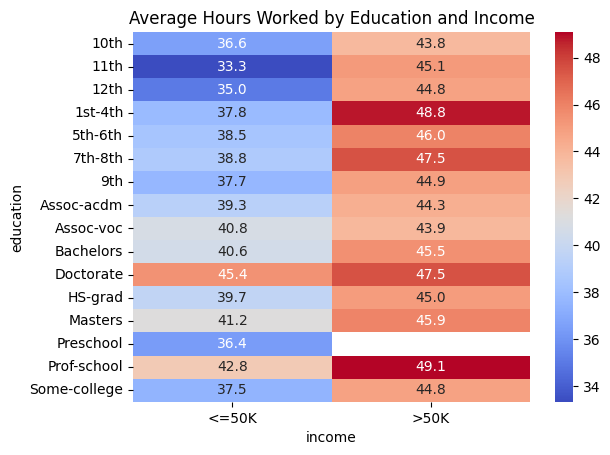

In [ ]:
# representamos la relacion entre las variables con un heatmap
heat = pd.pivot_table(
    df,
    values="hours_per_week",
    index="education",
    columns="income",
    aggfunc="mean")

sns.heatmap(heat, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Average Hours Worked by Education and Income")
plt.show()

#### Conclusión

La tabla muestra lo siguiente:
* Los individuos con ingresos superiores a 50K trabajan, en promedio, un mayor número de horas en todos los niveles educativos.
* Aunque un mayor número de horas trabajadas se asocia con ingresos más elevados, el nivel educativo modera claramente esta relación.
* Las personas con mayor nivel educativo tienen más probabilidades de percibir ingresos superiores a 50K incluso trabajando un número similar de horas, lo que indica que los resultados en términos de ingresos están determinados por la combinación del nivel educativo y las horas trabajadas, y no únicamente por las horas.


<h1 align="center">¿Entre los que tienen capital gain, que factores relacionan con mayores ganancias?</h1>

* Para completar este análisis, se procederá de la siguiente manera:
  + En primer lugar, se creará un sub-dataframe con los individuos que presentan ganancias de capital y se trabajará directamente con dicho subconjunto de datos.
  + En segundo lugar, se transformará la variable de ganancias de capital y se creará una nueva columna denominada log_capital_gain para su análisis.


In [188]:
# creamos un sub dataframe, con las filas de las personas que tienen capital gains
# create new sub dataframe, filtering only the rows where "has_capital_gains" == Yes i.e capital gains > 0
df_gain = df[df['has_capital_gain'] == 'Yes'].copy()

In [189]:
# creamos una nueva columna con la transformacion logaritmica de capital gain
# create new column "log_capital_gain" with log transformation of capital gain.
df_gain['log_capital_gain'] = np.log1p(df_gain['capital_gain'])

In [190]:
# creamos una nueva columna con bins de education para facilitar el analisis multivariante
# create a new column, "edu_bin" where we bin "education_num" for better use in multivariate analysis.
edu_bins = [0, 8, 12, 15, 16]
edu_labels = ['<HS', 'HS', 'Some College', 'Bachelor+']

df_gain['edu_bin'] = pd.cut(
    df_gain['education_num'],
    bins=edu_bins,
    labels=edu_labels,
    include_lowest=True
)

In [191]:
# enseñamos la correlacion entre las variables
# Show the correlation between the variables using person correlation.
df_gain[['log_capital_gain', 'age', 'education_num', 'hours_per_week']] \
    .corr()

,log_capital_gain,age,education_num,hours_per_week
log_capital_gain,1.000000,0.147675,0.407179,0.274349
age,0.147675,1.000000,0.015930,-0.091194
education_num,0.407179,0.015930,1.000000,0.192064
hours_per_week,0.274349,-0.091194,0.192064,1.000000


In [192]:
# correlacion de spearman entre age, education, hours worked,
# y capital gain transformado para cad grupo de income
df_gain.groupby('income')[['log_capital_gain', 'age', 'education_num', 'hours_per_week']].corr(method="spearman")

log_capital_gain       age  education_num  \
income                                                               
<=50K  log_capital_gain          1.000000  0.042888       0.141998   
       age                       0.042888  1.000000      -0.070556   
       education_num             0.141998 -0.070556       1.000000   
       hours_per_week            0.197658 -0.073558       0.117648   
>50K   log_capital_gain          1.000000  0.146810       0.322565   
       age                       0.146810  1.000000       0.025761   
       education_num             0.322565  0.025761       1.000000   
       hours_per_week            0.155115 -0.075125       0.164895   

                         hours_per_week  
income                                   
<=50K  log_capital_gain        0.197658  
       age                    -0.073558  
       education_num           0.117648  
       hours_per_week          1.000000  
>50K   log_capital_gain        0.155115  
       age                    -0.075125  
       education_num           0.164895  
       hours_per_week          1.000000

In [193]:
# Bin age into ranges to simplify interpretation and reduce the influence of extreme values in summaries
df_gain['age_bin'] = pd.cut(
    df_gain['age'],
    bins=[20, 30, 40, 50, 60, 70, 90],
    right=False)

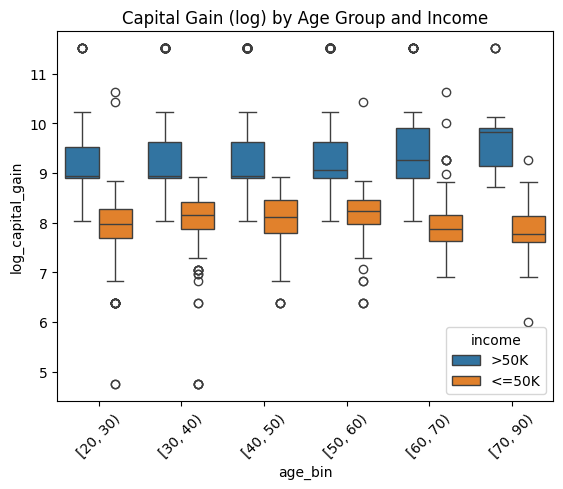

In [ ]:
# creamos un boxplot por el analisis multivariante entre age,capital gain y income
# Create boxplot for multivariate analysis between age, capital gain and income
sns.boxplot(
    data=df_gain,
    x='age_bin',
    y='log_capital_gain',
    hue='income')

plt.xticks(rotation=45)
plt.title('Capital Gain (log) by Age Group and Income')
plt.show()

### Conclusión

* Los individuos con ingresos superiores a 50K presentan mayores ganancias de capital que aquellos con ingresos iguales o inferiores a 50K en todos los grupos de edad.
* Las ganancias de capital aumentan ligeramente con la edad en ambos grupos de ingresos, pero la diferencia entre niveles de ingresos se mantiene constante.
* La edad, por sí sola, no explica las diferencias observadas en las ganancias de capital.
* El nivel de ingresos es un factor mucho más determinante que la edad para explicar las ganancias de capital.
* Los individuos con ingresos más altos muestran una mayor dispersión en las ganancias de capital, lo que indica una mayor variabilidad y un mayor potencial de ganancias.


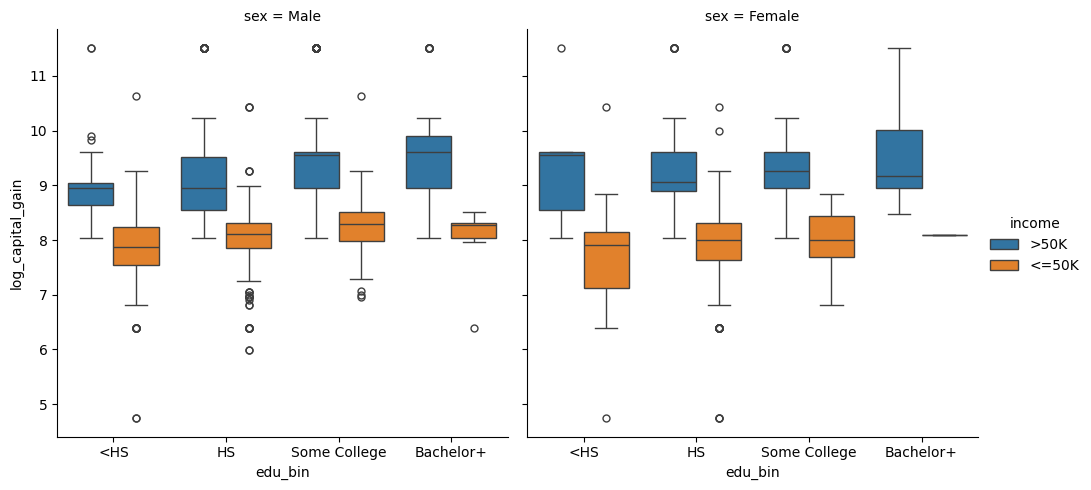

In [ ]:
# representamos la relacion entre las variables edu_bin, log_capital_gain y income
sns.catplot(
    data=df_gain,
    x='edu_bin',
    y='log_capital_gain',
    hue='income',
    col='sex',
    kind='box')
plt.show()

#### Conclusión

A partir de estos diagramas de caja se observa un patrón similar al identificado en el análisis previo.
* Los individuos con ingresos superiores a 50K presentan mayores ganancias de capital que aquellos con ingresos iguales o inferiores a 50K, en todos los niveles educativos y para ambos sexos.
* Las ganancias de capital tienden a aumentar con el nivel educativo tanto en hombres como en mujeres.
* La brecha de ingresos en términos de ganancias de capital está presente en todos los niveles educativos, lo que indica que el nivel de ingresos es un factor más determinante que la educación por sí sola.
* Los hombres tienden a presentar ganancias de capital ligeramente superiores a las de las mujeres dentro de los mismos grupos de educación e ingresos.
* La diferencia entre los grupos de ingresos es mayor que la diferencia observada entre sexos.
* La variabilidad de las ganancias de capital es mayor entre los individuos con ingresos más altos, especialmente en los niveles educativos superiores.


### Conclusión final: ¿Entre quienes presentan ganancias de capital, qué factores se relacionan con mayores ganancias?

* Los individuos con ingresos superiores a 50K presentan ganancias de capital significativamente más altas en todos los grupos analizados, lo que indica que el nivel de ingresos es el factor más influyente.
* El nivel educativo muestra una relación positiva clara con las ganancias de capital, especialmente entre los individuos con ingresos altos, donde la asociación es moderada y consistente.
* La edad presenta una relación positiva pero débil con las ganancias de capital, volviéndose más relevante entre los individuos con mayores ingresos, lo que sugiere un efecto de acumulación de riqueza a largo plazo.
* Las horas trabajadas muestran únicamente una relación débil con las ganancias de capital, lo que indica que estas no están directamente impulsadas por el esfuerzo laboral.
* El sexo introduce diferencias menores: los hombres tienden a presentar ganancias de capital ligeramente superiores; sin embargo, esta brecha es considerablemente menor que las diferencias asociadas al nivel de ingresos o al nivel educativo.
